# Sentiment Analysis
followed mostly https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [146]:
import pandas as pd
from transformers import pipeline
import os
import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
#%matplotlib inline
import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np

[nltk_data] Downloading package stopwords to /Users/marei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
reviews = pd.read_pickle("../data-clean/reviews.pkl")
reviews_features = pd.read_pickle("../data-clean/reviews_features.pkl")
review_languages = pd.read_pickle("../data-clean/review_languages.pkl")

reviews["language"] = review_languages
reviews.head()

,id,date,reviewer_id,reviewer_name,comments,language
listing_id,,,,,,
42932,6993655,2013-09-02,3815640,Christianne,We stayed in Cecilie's apartment for 2 weeks w...,en
42932,17374681,2014-08-11,6263186,Ange,The apt is absolutely beautiful and Cecilie we...,en
42932,24592137,2014-12-31,2092478,Anne-Marie,"The apartment was as described, nice and cozy....",en
42932,30332056,2015-04-20,8016527,Jennifer,We had an absolutely wonderful time at Cecilie...,en
42932,34892555,2015-06-13,21218589,Tere,Cecilie is the kindest and most generous host ...,en


In [141]:
comments = reviews["comments"].iloc[0]
comments

"We stayed in Cecilie's apartment for 2 weeks while working in Oslo. Cecilie is a perfect host, and her apartment is spacious, comfortable and absolutely beautiful. Located in a great part of town close to Aker Brygge and the town centre. High recommended!"

In [108]:
reviews = reviews[reviews["comments"].notna()]
reviews.shape

(77701, 6)

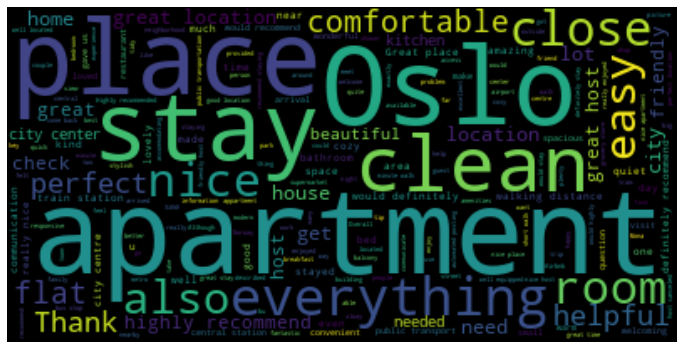

In [114]:
stops = set(stopwords.words('english'))
eng_comments = reviews["comments"][reviews["language"] == "en"]
stops.update(["br", "href"])
text = " ".join(i for i in eng_comments)
wordcloud = WordCloud(stopwords=stops).generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

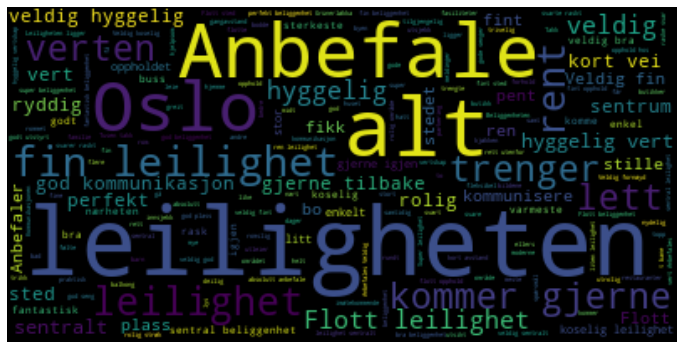

In [117]:
stops = set(stopwords.words('norwegian'))
nor_comments = reviews["comments"][reviews["language"] == "no"]
stops.update(["br", "href"])
text = " ".join(i for i in nor_comments)
wordcloud = WordCloud(stopwords=stops).generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

In [157]:
length = []
for i in range(len(reviews["comments"])):
    length.append(len(reviews["comments"].iloc[i]))

length = np.array(length)

In [210]:
reviews.columns

Index(['id', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'language'], dtype='object')

In [213]:
reviews["comments"].index[0]

42932

In [179]:
np.arange(11, 21)

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [194]:
sentiment_analyizer = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [220]:
df = pd.DataFrame(columns=['listings_id', 'id', 'comment', 'label', 'score'])

In [221]:
# decide if comment is positive or negative and save in data frame
n = len(reviews["comments"])
for i in range(n):
#for i in np.arange(11,21):
    comment = reviews["comments"].iloc[i]
    # if len(comment) > 500:
    #     label = "None"
    #     score = "None"
    # else:
    try:
        result = sentiment_analyizer(comment)[0]
    except:
        label = "None"
        score = "None"
    else:
        label = result['label']
        score = result['score']

    new_row = {'listings_id': reviews["comments"].index[i], 'id': reviews["id"].iloc[i], 'comment': comment, 'label': label, 'score': score}
    df = df.append(new_row, ignore_index=True)

    if i % 100 == 0:
        print(i)

df = df.set_index('listings_id')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


Token indices sequence length is longer than the specified maximum sequence length for this model (732 > 512). Running this sequence through the model will result in indexing errors


1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
1960

In [228]:
df

,id,comment,label,score
listings_id,,,,
42932,6993655,We stayed in Cecilie's apartment for 2 weeks w...,POSITIVE,0.999883
42932,17374681,The apt is absolutely beautiful and Cecilie we...,POSITIVE,0.999879
42932,24592137,"The apartment was as described, nice and cozy....",POSITIVE,0.999838
42932,30332056,We had an absolutely wonderful time at Cecilie...,POSITIVE,0.999705
42932,34892555,Cecilie is the kindest and most generous host ...,POSITIVE,0.999842
...,...,...,...,...
52260296,458449962734377862,"We had a great stay, the apartment was large a...",POSITIVE,0.999471
52319045,459849131957446475,"Very nice apartment , with great view from the...",POSITIVE,0.999839
52366598,459886443009660402,"Veldig fin leilighet, lun og koselig. Kort gåt...",NEGATIVE,0.978796


In [229]:
df.to_pickle(path="reviews_sentimentA.pkl")

In [234]:
df[df.language.isna()]

,id,comment,label,score,language
listings_id,,,,,
588353,231460932,.,POSITIVE,0.966878,<NA>
760266,565217521,.,POSITIVE,0.966878,<NA>
761018,54902302,-,POSITIVE,0.987241,<NA>
977648,192377350,.,POSITIVE,0.966878,<NA>
1226982,545965619,.,POSITIVE,0.966878,<NA>
...,...,...,...,...,...
50453286,411393826191071939,:),POSITIVE,0.648929,<NA>
50534156,406220714710960019,.,POSITIVE,0.966878,<NA>
51144124,421498554930485205,10,POSITIVE,0.98659,<NA>


In [240]:
df.comment[df.label == "None"].iloc[0]

'(There is an english translation above.)\r<br/>Rein et Jennifer sont des hôtes conviviaux (ils savent très bien mettre à l\'aise) et disponibles. Ils nous ont conseillé des lieux à visiter ou à éviter et aider à comprendre les horaires d\'un ferry (écrit en "norvégien"). Ils sont curieux d\'en apprendre plus sur notre culture et c\'était sympa de parler avec eux :). \r<br/>\r<br/>La chambre est en réalité composée de 2 pièces : une avec le lit (très très confortable) et l\'autre avec une table, deux chaises, un canapé et le nécessaire pour préparer un petit déjeuner. Le tout était spacieux. De la documentation et un classeur réalisé par Rein et Jennifer pour nous aider dans notre découverte d\'Oslo étaient à disposition dans cette seconde pièce. \r<br/>Dans la salle de bain, divers coins "guest" (ainsi que deux grandes serviettes et deux petites) sont à notre disposition, ce qui met à l\'aise aussi :). \r<br/>\r<br/>L\'emplacement de la maison de Rein et Jennifer est pratique : elle s